# Support Vector Machines

Use SVM classifiers to classify handwritten digits 

In [1]:
# Mount Google drive and cd to working folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Learning/EIE4105/lab2/python/

Mounted at /content/drive
/content/drive/My Drive/Learning/EIE4105/lab2/python


In [1]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC

<font color='blue'>Step 6</font>

In [2]:
# Load N training samples
from mnist import load_SampleMnist
nSamples = 10
trainpath = '../../lab1/data/noisy_train_digits.mat'
testpath = '../../lab1/data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels = load_SampleMnist(trainpath,testpath,nSamples)
print(train_data.shape)

(100, 784)


# SVM Classifier with Linear Kernels (Linear SVC)
Train and test a linear SVM classifier on MNIST data using the default setting of the SVM
Refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html for the documentation of LinearSVC in the sklearn.svm package.

In [3]:
svm = LinearSVC(dual=True, multi_class='ovr', loss='hinge')
svm.fit(train_data, train_labels)
print(svm.classes_)
print(svm.coef_.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 784)


In [4]:
pred = svm.predict(test_data)

In [5]:
# Compute accuracy
acc = accuracy_score(test_labels, pred)
print(acc)

0.6811


# SVM Classifier with Polynomial kernels
Refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC for the documentation of SVM classifiers with polynomial kernels and RBF kernels.

<font color='blue'>Steps 7--8</font>

In [6]:
# Load N training samples
from mnist import load_SampleMnist
nSamples = 785
trainpath = '../../lab1/data/noisy_train_digits.mat'
testpath = '../../lab1/data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels = load_SampleMnist(trainpath,testpath,nSamples)
print(train_data.shape)

(7850, 784)


In [7]:
kerType = 'poly';
kerPara = 2; 
svm = SVC(kernel=kerType ,degree=kerPara)
svm.fit(train_data, train_labels)

SVC(degree=2, kernel='poly')

In [8]:
pred = svm.predict(test_data)

In [9]:
accuracy_score(test_labels, pred) # Accuracy

0.9569

In [12]:
import matplotlib.pyplot as plt
print(svm.n_support_)                # Number of support vectors for each class
print(svm.support_vectors_.shape)    # Shape of SV matrix: (total_num_of_sv, feature_dim)
print(svm.support_.shape)            # Indexes of SV to the train_data[:,:] matrix

[199 153 354 356 360 439 243 308 379 393]
(3184, 784)
(3184,)


Digit 0


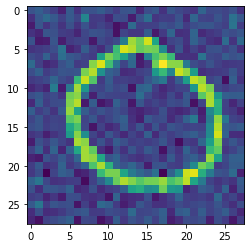

In [13]:
import numpy as np
d = 0
last = np.sum(svm.n_support_[:d+1]) - 1                   # Index to the last SV of Digit d
first = np.sum(svm.n_support_[:d+1]) - svm.n_support_[d]  # Index to the first SV of Digit d
plt.imshow(svm.support_vectors_[first].reshape(28,28))    # Image of the first SV of Digit d
print(f"Digit {train_labels[svm.support_[first]]}")

<font color='blue'>Step 9</font>

In [14]:
# To inspect the values of alpha_i x y_i (where alpha_i>0), you need to use 
# sklearn.svm.SVC as a binary classifier, i.e., we use one SVM for each digit 
# and ask the SVM to consider one digit as the positive class and the rest as 
# the negative classes. Therefore, we need to modify the train_labels[]
d = 0
labels = np.copy(train_labels)    # Deep copy
labels[labels != d] = d-1    # Make it not Digit d
kerType = 'poly';
kerPara = 2; 
svm = SVC(kernel=kerType ,degree=kerPara, C=10)
svm.fit(train_data, labels)
print(svm.dual_coef_.shape)
print(svm.n_support_) 

(1, 561)
[402 159]


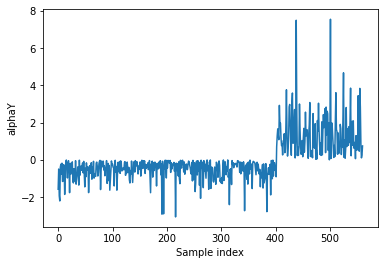

In [15]:
# Plot alpha_i x y_i
import matplotlib.pyplot as plt
alphaY = svm.dual_coef_[0,:]
plt.plot(alphaY)
plt.xlabel('Sample index')
plt.ylabel('alphaY')
plt.show()

Positive Class: Digit 0
Negative class: Digit 6


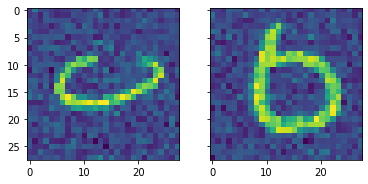

In [16]:
# Plot the most influential SV the positive-class and negative-class, respectively.
# The SV from the positive class should be a Digit "d" but does not look like a "d"
# The SV from the negative class should not be a "d" but looks like a "d"
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, )
pos = np.argmax(alphaY)
neg = np.argmin(alphaY)
pos_img = svm.support_vectors_[pos].reshape(28,28)
neg_img = svm.support_vectors_[neg].reshape(28,28)
ax[0].imshow(pos_img, interpolation='nearest')
ax[1].imshow(neg_img, interpolation='nearest')
print(f'Positive Class: Digit {train_labels[svm.support_[pos]]}')
print(f'Negative class: Digit {train_labels[svm.support_[neg]]}')

# SVM Classifier with RBF Kernels (SVC RBF)


<font color='blue'>Step 10</font>

In [17]:
kerType = 'rbf'
kerPara = 1/500
svm = SVC(kernel=kerType, gamma=kerPara, C=10)
svm.fit(train_data, train_labels)
print(svm.get_params())

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.002, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [18]:
pred = svm.predict(test_data)

In [19]:
accuracy_score(test_labels, pred) # Accuracy

0.9634

In [20]:
import matplotlib.pyplot as plt
print(svm.n_support_)                # Number of support vectors for each class
print(svm.support_vectors_.shape)    # Shape of SV matrix: (total_num_of_sv, feature_dim)
print(svm.support_.shape)            # Indexes of SV to train_data[][] matrix

[292 281 469 481 484 571 387 423 519 544]
(4451, 784)
(4451,)


Digit 4


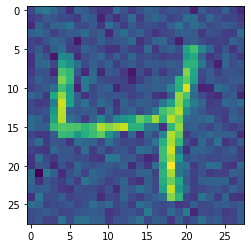

In [21]:
import numpy as np
d = 4
last = np.sum(svm.n_support_[:d+1]) - 1                   # Index to the last SV of Class d
first = np.sum(svm.n_support_[:d+1]) - svm.n_support_[d]  # Index to the first SV of Class d
plt.imshow(svm.support_vectors_[first].reshape(28,28))    # Image of the first SV of Class d
print(f"Digit {train_labels[svm.support_[first]]}")

In [22]:
# To inspect the values of alpha_i x y_i (where alpha_i>0), you need to use 
# sklearn.svm.SVC as a binary classifier, i.e., we use one SVM for each digit 
# and ask the SVM to consider one digit as the positive class and the rest as 
# the negative classes. Therefore, we need to modify the train_labels[]
d = 0
labels = np.copy(train_labels)    # Deep copy
labels[labels != d] = d-1    # Make it not Digit d
kerType = 'rbf';
kerPara = 2; 
svm = SVC(kernel=kerType ,degree=kerPara, C=10)
svm.fit(train_data, labels)
print(svm.dual_coef_.shape)
print(svm.n_support_) 

(1, 517)
[327 190]


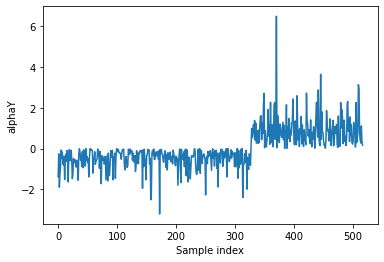

In [23]:
# Plot alpha_i x y_i
import matplotlib.pyplot as plt
alphaY = svm.dual_coef_[0,:]
plt.plot(alphaY)
plt.xlabel('Sample index')
plt.ylabel('alphaY')
plt.show()

Positive Class: Digit 0
Negative class: Digit 6


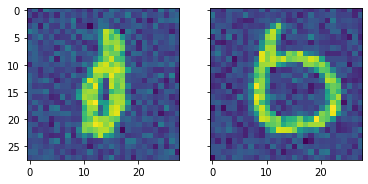

In [24]:
# Plot the most influential SV the positive-class and negative-class, respectively.
# The SV from the positive class should be a Digit "d" but does not look like a "d"
# The SV from the negative class should not be a "d" but looks like a "d"
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, )
pos = np.argmax(alphaY)
neg = np.argmin(alphaY)
pos_img = svm.support_vectors_[pos].reshape(28,28)
neg_img = svm.support_vectors_[neg].reshape(28,28)
ax[0].imshow(pos_img, interpolation='nearest')
ax[1].imshow(neg_img, interpolation='nearest')
print(f'Positive Class: Digit {train_labels[svm.support_[pos]]}')
print(f'Negative class: Digit {train_labels[svm.support_[neg]]}')

In [ ]:
# loading all of the data in the MNIST dataset
from mnist import load_mnist
trainpath = '../../lab1/data/noisy_train_digits.mat'
testpath = '../../lab1/data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels= load_mnist(trainpath,testpath)
print(train_data.shape)